In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [48]:
#Importing data into dataframe
df = pd.read_csv('../data/raw/fff_Bw_1min.dat', delim_whitespace=True)

#Adding column names to dataframe
df.columns = ['year', 'month', 'day', 'hour', 'minute', 
              'L', 'MLT', 'MLAT', 'AL Index', 
              'KP Index', 'Satellite Flag', 'B']

# Converting year + month + day + hour + minute + second to datetime
datetime = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']])

# Adding datetime column to dataframe
df.insert(0, "datetime", datetime, True)

# Dropping useless columns
df = df.drop(['year', 'month', 'day', 'hour', 'minute', 'AL Index', 'KP Index'], axis=1)

df.head()

,datetime,L,MLT,MLAT,Satellite Flag,B
0,2010-06-01 10:51:00,9.13,22.69,-1.43,0.0,0.000765
1,2010-06-01 10:52:00,9.03,22.7,-1.44,0.0,0.000699
2,2010-06-01 10:53:00,9.02,22.7,-1.45,0.0,0.000786
3,2010-06-01 10:54:00,9.06,22.71,-1.46,0.0,0.000748
4,2010-06-01 10:55:00,8.95,22.72,-1.48,0.0,0.000933


In [49]:
df['Satellite Flag'].value_counts()

0.000000    482881
1.000000    461864
2.000000    459017
0.001010      2519
0.001040      2455
0.001020      2418
0.001070      2103
0.001100      2018
0.001050      2012
0.001030      2006
0.001130      1988
0.001080      1932
0.001160      1855
0.001190      1816
0.001230      1788
0.001060      1596
0.001110      1590
0.001260      1577
0.001330      1449
0.001290      1444
0.001140      1407
0.001090      1359
0.001370      1346
0.001120      1293
0.001170      1283
0.001400      1225
0.001440      1215
0.001000      1145
0.001200      1130
0.001150      1117
0.001480      1057
0.001520      1042
0.001180       986
0.001220       948
0.001560       896
0.001270       895
0.001250       882
0.001240       879
0.001300       878
0.001650       868
0.001700       863
0.001610       854
0.001210       822
0.001280       818
0.001320       781
0.001730       711
0.001310       700
0.001740       681
0.001390       669
0.001340       664
0.001360       663
0.001430       659
0.001410    

In [50]:
# Converting satellite flag values to int
df['Satellite Flag'] = df['Satellite Flag'].astype(int)
df['Satellite Flag'].value_counts()

0    738633
1    461864
2    459017
Name: Satellite Flag, dtype: int64

In [91]:
df_sat0 = df.loc[(df['Satellite Flag'] == 0)]
df_sat0.tail()

,datetime,L,MLT,MLAT,Satellite Flag,B
1659252,2018-02-28 14:39:00,9.80,22.85-12.11,-185.0,0,NaN
1659253,2018-02-28 14:40:00,9.89,22.86-12.11,-196.0,0,NaN
1659254,2018-02-28 14:41:00,9.88,22.86-12.11,-204.0,0,NaN
1659255,2018-02-28 14:42:00,9.91,22.87-12.10,-197.0,0,NaN
1659256,2018-02-28 14:43:00,9.94,22.87-12.10,-177.0,0,NaN


In [52]:
df_sat0['Satellite Flag'].value_counts()

0    738633
Name: Satellite Flag, dtype: int64

In [77]:
df_sat0_sorted = df_sat0.sort_values(by = 'datetime')

(array([733773., 734138., 734503., 734869., 735234., 735599., 735964.,
        736330., 736695.]), <a list of 9 Text xticklabel objects>)

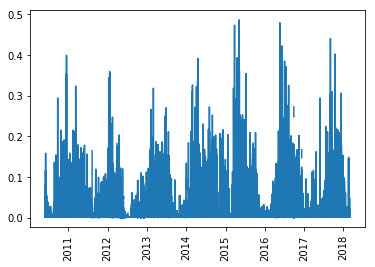

In [78]:
# Plotting data for 1 satellite to see if there is a trend
plt.plot(df_sat0_sorted['datetime'], df_sat0_sorted['B'])
plt.xticks(rotation='vertical')

In [93]:
# Check if measurements are being taken every minute or not
df_sat0_sorted['datetime_diff'] = df_sat0_sorted['datetime'].diff()
df_sat0_sorted.head()
#pd.set_option('display.max_rows', df_sat0_sorted.shape[0]+1)
df_sat0_sorted['datetime_diff'].value_counts()

0 days 00:01:00     643432
0 days 00:00:00      83976
0 days 00:02:00       3394
0 days 00:03:00       1405
0 days 00:04:00        700
0 days 00:06:00        476
0 days 00:05:00        459
0 days 00:07:00        248
0 days 00:09:00        240
0 days 00:08:00        202
0 days 00:10:00        110
0 days 00:11:00         84
0 days 00:12:00         73
0 days 00:13:00         68
0 days 00:14:00         65
0 days 00:17:00         46
0 days 00:15:00         39
0 days 00:16:00         37
0 days 11:34:00         35
0 days 00:18:00         30
0 days 00:20:00         30
0 days 00:19:00         29
0 days 00:22:00         27
0 days 11:24:00         26
0 days 00:54:00         26
0 days 00:23:00         24
0 days 00:24:00         23
0 days 00:21:00         22
1 days 00:03:00         21
1 days 00:04:00         21
0 days 00:28:00         16
0 days 00:30:00         16
0 days 00:34:00         16
0 days 00:25:00         16
0 days 01:54:00         15
0 days 00:36:00         15
0 days 00:26:00         15
0

In [88]:
# Total missing time
df_sat0_sorted['datetime_diff'].sum()

Timedelta('2829 days 03:52:00')

In [90]:
print((2829 - 643432/(24*60))/365)

6.526499238964993


In [92]:
# So assuming time step of 1 minute, out of 7.5 years, basically 6.5 years worth of data is missing!!!!
# Maybe we can use a bigger time step!!

In [84]:
# Clearly there is missing data, we can use some technique to fill it
# Insert missing rows
# Set datetime as the index with frequency of 1 minute
# Dropping duplicates
df_sat0_sorted_1 = df_sat0_sorted[~df_sat0_sorted.datetime.duplicated()]
df_sat0_sorted_1 = df_sat0_sorted_1.set_index('datetime').asfreq('1Min')
print("Old dataframe size =", df_sat0_sorted.size)
print("New dataframe size =", df_sat0_sorted_1.size)

Old dataframe size = 5170431
New dataframe size = 24443958


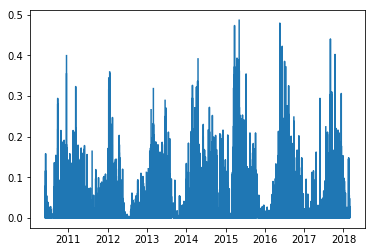

In [85]:
# Plotting data again
plt.plot(df_sat0_sorted_1['B'])

In [57]:
# Run LSTM/ARIMA/ARCH/VAR
